# CONVUTIONAL NEURAL NETWORK

## PRAKTIKUM 1
Klasifikasi 🐱 dan 🐶

### Deskripsi
Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

### Dataset
Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.

https://drive.google.com/file/d/1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb/view



### Langkah 1 - Import Library

In [5]:
# Akses Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

#### Langkah 2.1. Pra Pengolahan Data Training

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8064 images belonging to 2 classes.


#### Langkah 2.2. Pra Pengolahan Data Testing

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### Langkah 3 - Pembuatan Model CNN

#### Langkah 3.1. - Inisiasi Model CNN

In [9]:
cnn = tf.keras.models.Sequential()

#### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### Langkah 3.3 - Pembuatan Layer Pooling 1

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.5 - Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

#### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [15]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Langkah 3.8 - Compile Model CNN

In [16]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

### Langkah 4 - Fit CNN

In [17]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
252/252 [==============================] - 2277s 9s/step - loss: 0.6782 - accuracy: 0.5709 - val_loss: 0.6370 - val_accuracy: 0.6445
Epoch 2/25
252/252 [==============================] - 37s 146ms/step - loss: 0.6252 - accuracy: 0.6529 - val_loss: 0.5817 - val_accuracy: 0.6985
Epoch 3/25
252/252 [==============================] - 36s 144ms/step - loss: 0.5769 - accuracy: 0.7026 - val_loss: 0.5607 - val_accuracy: 0.7130
Epoch 4/25
252/252 [==============================] - 37s 146ms/step - loss: 0.5537 - accuracy: 0.7153 - val_loss: 0.5362 - val_accuracy: 0.7465
Epoch 5/25
252/252 [==============================] - 37s 146ms/step - loss: 0.5136 - accuracy: 0.7406 - val_loss: 0.5507 - val_accuracy: 0.7370
Epoch 6/25
252/252 [==============================] - 36s 143ms/step - loss: 0.5060 - accuracy: 0.7542 - val_loss: 0.4912 - val_accuracy: 0.7740
Epoch 7/25
252/252 [==============================] - 39s 154ms/step - loss: 0.4858 - accuracy: 0.7594 - val_loss: 0.5309 - val_acc

### Langkah 5 - Prediksi dengan 1 Citra

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [19]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Classroom/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 143ms/step


## PRAKTIKUM 2
Klasifikasi Multi-label dengan Data CIFAT

Desclaimer: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman
https://www.tensorflow.org/tutorials/images/cnn

### Deskripsi
Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

### Langkah 1 - Load Library

In [20]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 10s 0us/step


### Langkah 3 - Verifikasi Data

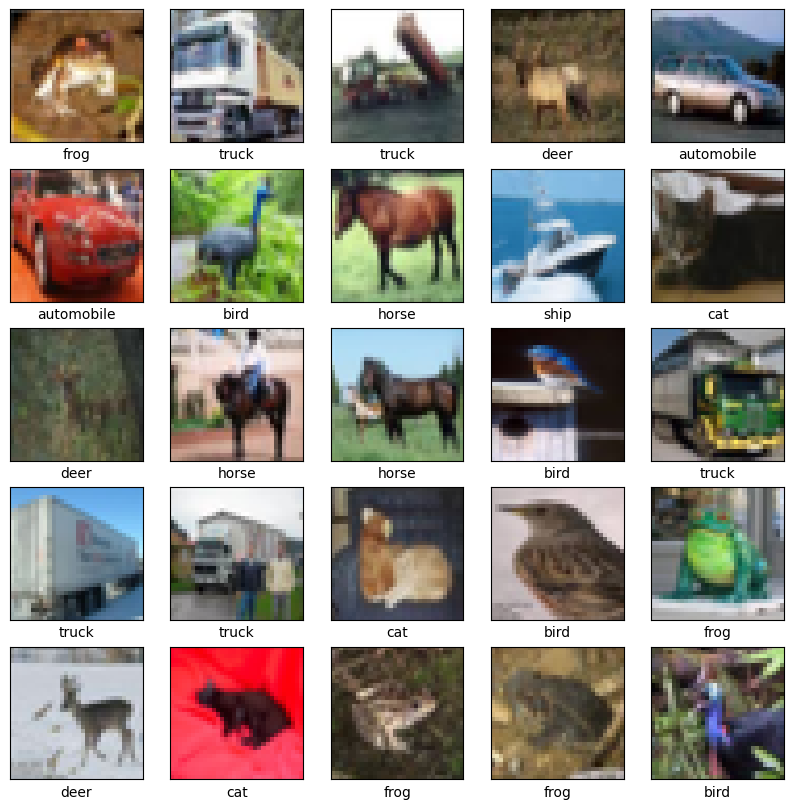

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### Langkah 4.1. - Buat Layer Konvolusi

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Langkah 4.2. - Cek Arsitektur Konvolusi

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

#### Langkah 4.3. - Tambahkan Layer Fully Connected

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### Langkah 4.4. - Cek Arsitektur Model CNN

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#### Langkah 4.5. - Compile Model CNN

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Langkah 5 - Fit Model

In [28]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5234 - accuracy: 0.4452 - val_loss: 1.2821 - val_accuracy: 0.5415
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1743 - accuracy: 0.5838 - val_loss: 1.1047 - val_accuracy: 0.6094
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0261 - accuracy: 0.6404 - val_loss: 1.0030 - val_accuracy: 0.6502
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9291 - accuracy: 0.6753 - val_loss: 0.9973 - val_accuracy: 0.6522
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8506 - accuracy: 0.7022 - val_loss: 0.9560 - val_accuracy: 0.6747
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7908 - accuracy: 0.7242 - val_loss: 0.9174 - val_accuracy: 0.6830
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7379 - accuracy: 0.7398 - val_loss: 0.9085 - val_accura

### Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.9966 - accuracy: 0.6757 - 701ms/epoch - 2ms/step


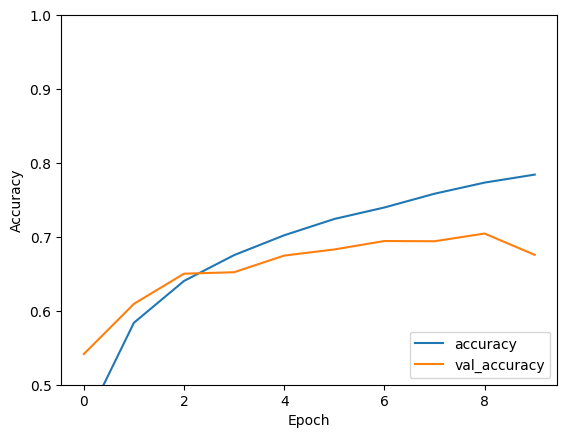

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Langkah 7 - Cetak Hasil Akurasi

In [30]:
print(test_acc)

0.6757000088691711


# TUGAS

## 1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [31]:
# Import Library
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [32]:
# Memuat dataset CIFAR
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [33]:
# Normalisasi data dan konversi label ke vektor one-hot encoded
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [35]:
# Memisahkan data latih menjadi data latih dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [36]:
# Mendefinisikan model Convolutional Neural Network (CNN)
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()
    return model

In [37]:
# Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

In [38]:
# Membuat model dan mengompilasi
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)        

In [39]:
# Melatih model dengan ImageDataGenerator
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 64s 93ms/step - loss: 2.1458 - accuracy: 0.1927 - val_loss: 1.8440 - val_accuracy: 0.2937
Epoch 2/50
625/625 [==============================] - 33s 52ms/step - loss: 1.7354 - accuracy: 0.3471 - val_loss: 1.5234 - val_accuracy: 0.4522
Epoch 3/50
625/625 [==============================] - 37s 59ms/step - loss: 1.5406 - accuracy: 0.4452 - val_loss: 1.3781 - val_accuracy: 0.5065
Epoch 4/50
625/625 [==============================] - 33s 52ms/step - loss: 1.4050 - accuracy: 0.5101 - val_loss: 1.1665 - val_accuracy: 0.5908
Epoch 5/50
625/625 [==============================] - 33s 53ms/step - loss: 1.2950 - accuracy: 0.5596 - val_loss: 1.1605 - val_accuracy: 0.6007
Epoch 6/50
625/625 [==============================] - 34s 55ms/step - loss: 1.2161 - accuracy: 0.5966 - val_loss: 1.0959 - val_accuracy: 0.6248
Epoch 7/50
625/625 [==============================] - 34s 54ms/step - loss: 1.1516 - accuracy: 0.6197 - val_loss: 1.1183 - val_accuracy:

<Axes: >

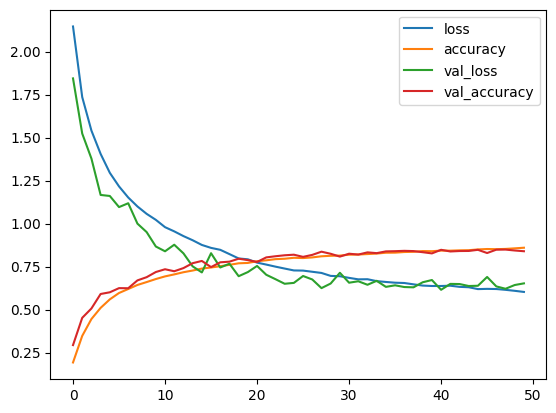

In [41]:
# Mengevaluasi model pada set tes
pd.DataFrame(history.history).plot()

In [42]:
# Menampilkan laporan klasifikasi
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.83      0.97      0.89      1000
           2       0.82      0.78      0.80      1000
           3       0.79      0.58      0.67      1000
           4       0.83      0.82      0.83      1000
           5       0.82      0.73      0.77      1000
           6       0.85      0.92      0.88      1000
           7       0.83      0.92      0.87      1000
           8       0.92      0.87      0.90      1000
           9       0.84      0.88      0.86      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000



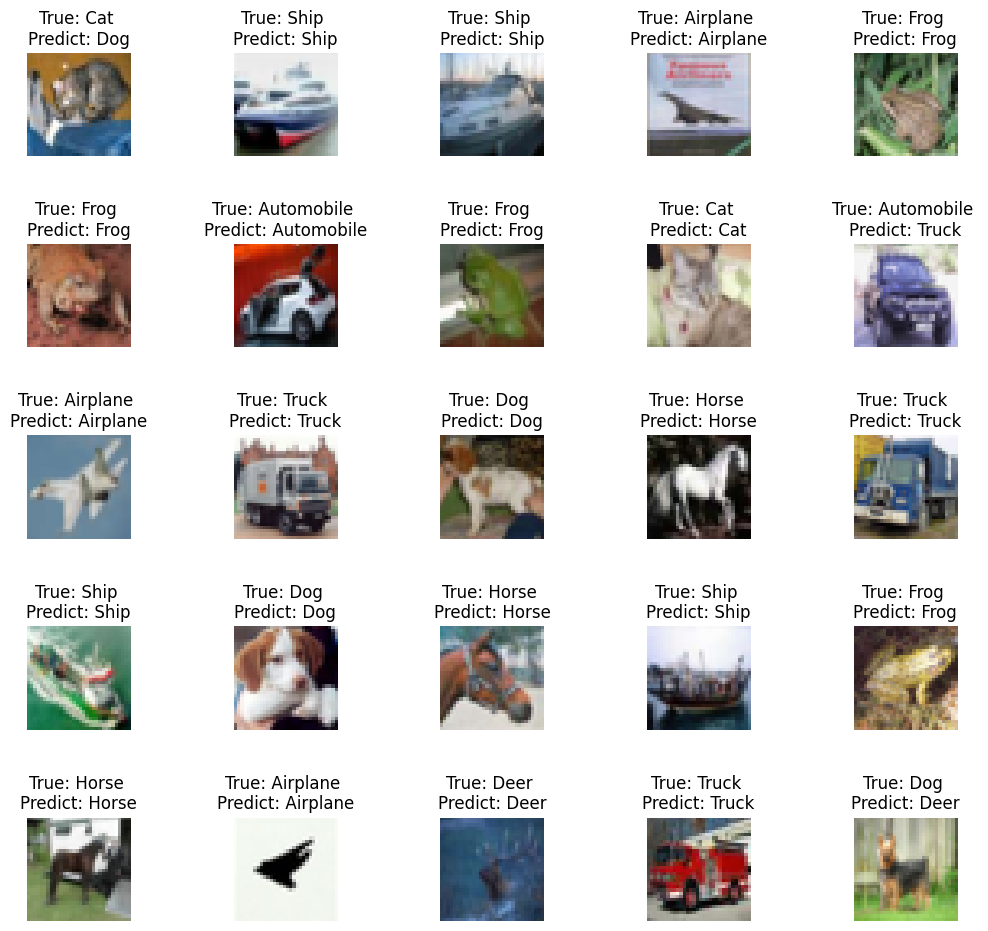

In [43]:
# Menampilkan visualisasi hasil prediksi
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## 2. Buatlah model CNN untuk klasifikasi dataset MNIST.

In [44]:
# Memuat dataset MNIST
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [45]:
# Normalisasi Gambar ke Rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [46]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [47]:
# Menampilkan Informasi tentang Dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [49]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [52]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 5s - loss: 0.3506 - accuracy: 0.8926 - val_loss: 0.0856 - val_accuracy: 0.9743 - 5s/epoch - 17ms/step
Epoch 2/10
329/329 - 2s - loss: 0.0953 - accuracy: 0.9720 - val_loss: 0.0712 - val_accuracy: 0.9791 - 2s/epoch - 7ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0670 - accuracy: 0.9796 - val_loss: 0.0615 - val_accuracy: 0.9824 - 2s/epoch - 5ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0518 - accuracy: 0.9845 - val_loss: 0.0511 - val_accuracy: 0.9856 - 2s/epoch - 5ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0441 - accuracy: 0.9867 - val_loss: 0.0440 - val_accuracy: 0.9872 - 2s/epoch - 6ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0435 - val_accuracy: 0.9877 - 2s/epoch - 7ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.0429 - val_accuracy: 0.9881 - 2s/epoch - 7ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0449 - val_accuracy: 0.9873 - 2s/epoch - 7ms/step
Epoch 9/10
329/329 - 2s

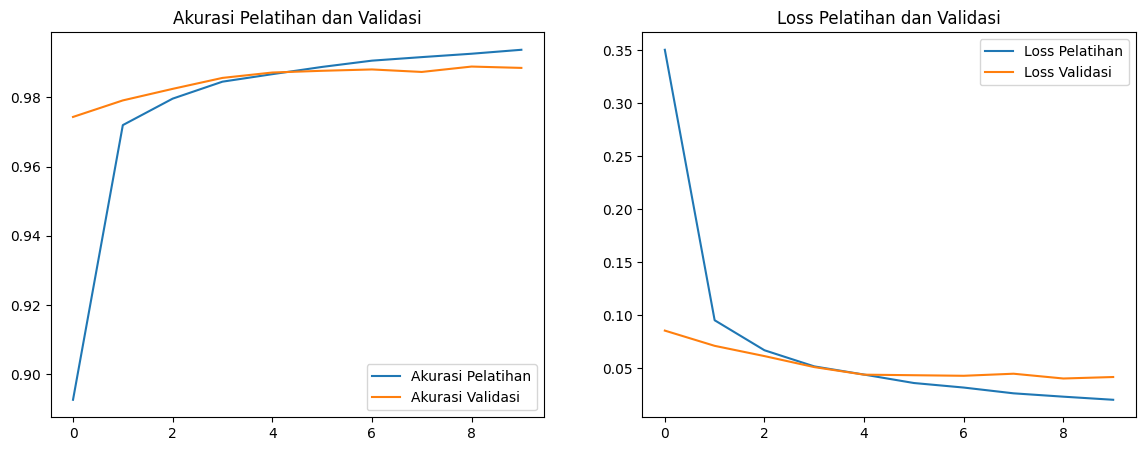

In [53]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

In [54]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.02915661223232746
Akurasi Validasi: 0.9922999739646912


In [55]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [56]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

In [57]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(58.222222222222214, 0.5, 'Aktual')

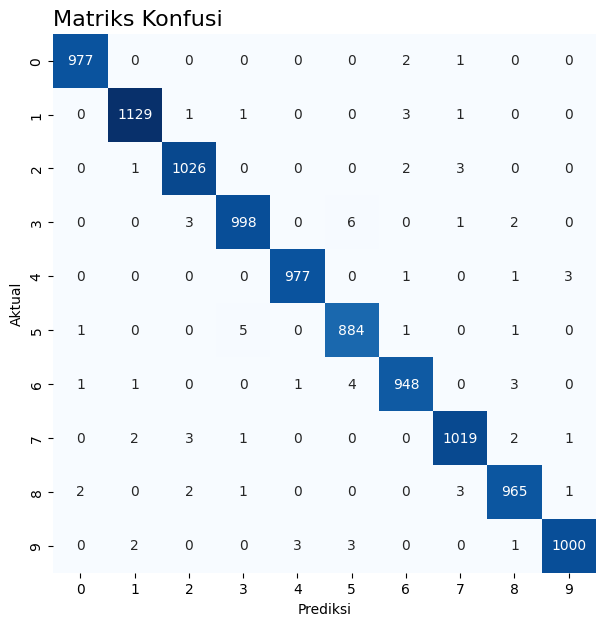

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

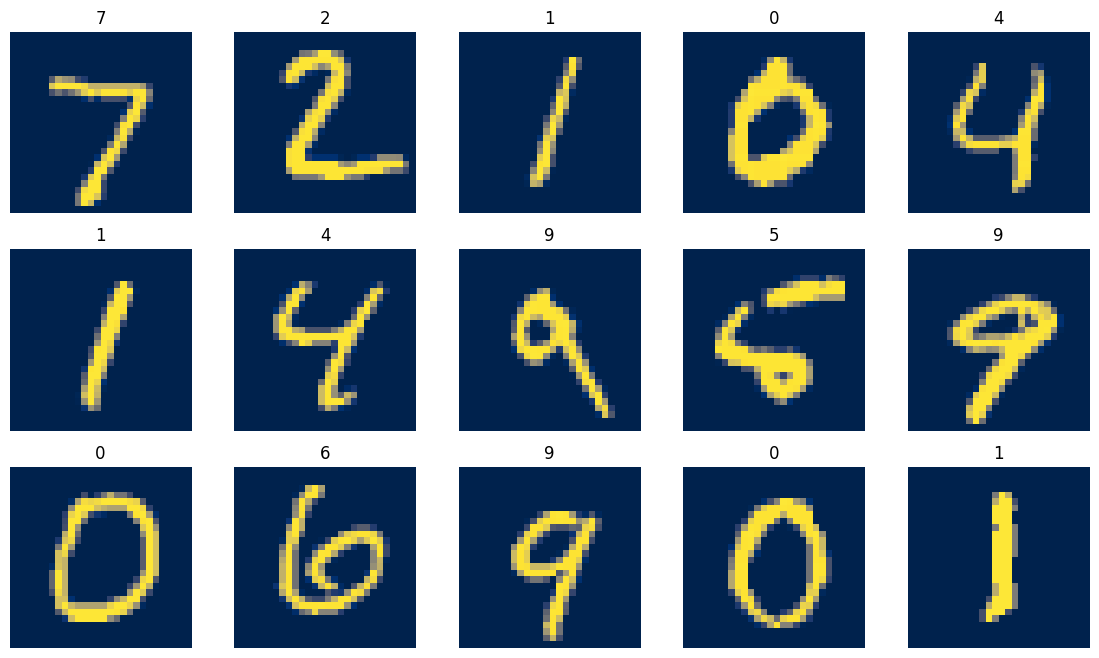

In [59]:
# Menampilkan target yang diprediksi pada setiap gambar (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')